In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

In [28]:
if not os.path.isfile('s&p500.csv'):
    try:
        import yfinance as yf
    except:
        os.system('pip install yfinance')
    
    import yfinance as yf
    data = yf.download('^GSPC', start="2000-01-01", end="2021-04-30")
    data.to_csv('s&p500.csv')


# read the data from s&p500.csv
data = pd.read_csv('s&p500.csv')

In [35]:
warnings.filterwarnings('ignore')
model = sm.tsa.MarkovRegression(data['Adj Close'], k_regimes=3, trend='ct', switching_variance=True)
model_fit = model.fit()
# print(model_fit.summary())
warnings.filterwarnings('default')


In [36]:
# print the transition matrix
print(model_fit.expected_durations)

[   7.01029602   82.41661403 1387.95921024]


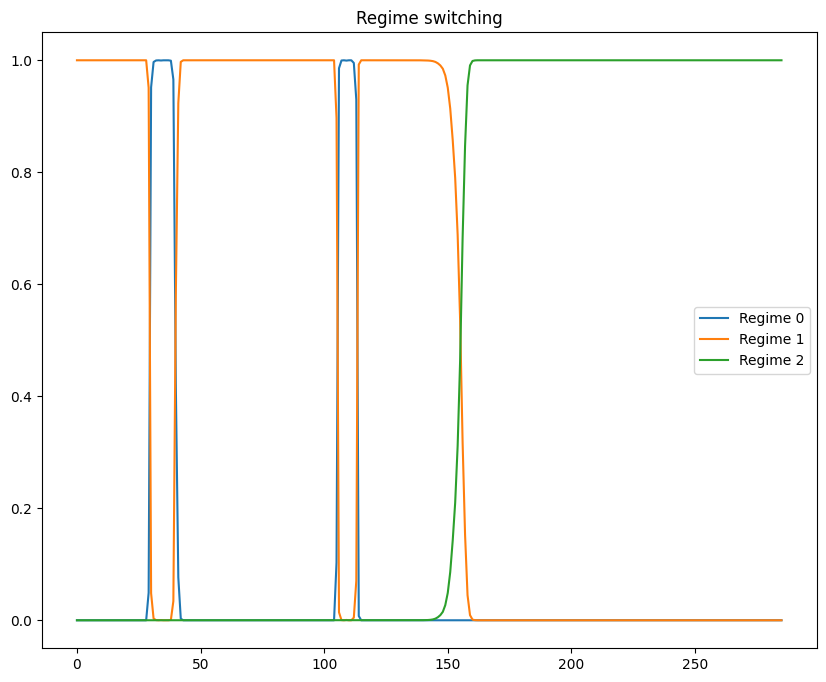

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(model_fit.smoothed_marginal_probabilities[0], label='Regime 0')
plt.plot(model_fit.smoothed_marginal_probabilities[1], label='Regime 1')
plt.plot(model_fit.smoothed_marginal_probabilities[2], label='Regime 2')
plt.legend()
plt.title('Regime switching')
plt.show()

In [45]:
# predict for next 5 time intervals
pred = model_fit.predict(5)
print(pred)

5      1165.199715
6      1166.131518
7      1167.063320
8      1167.995122
9      1168.926924
          ...     
281    4146.088130
282    4166.969493
283    4187.850855
284    4208.732217
285    4229.613580
Length: 281, dtype: float64
